In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("balance-scale.data",sep = ',')

In [8]:
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [14]:
X = df.drop(columns = ['Class Name'])
y = df['Class Name']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [18]:
dtc = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 25)

In [20]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [24]:
predictions = dtc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.79      0.64      0.71        76
           R       0.65      0.87      0.75        71

    accuracy                           0.71       157
   macro avg       0.48      0.51      0.49       157
weighted avg       0.68      0.71      0.68       157



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
dtc_e = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 25)
dtc_e.fit(X_train,y_train)
predictions = dtc_e.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.75      0.75      0.75        76
           R       0.69      0.79      0.74        71

    accuracy                           0.72       157
   macro avg       0.48      0.51      0.50       157
weighted avg       0.68      0.72      0.70       157



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,predictions)
cnf

array([[ 0,  4,  6],
       [ 0, 57, 19],
       [ 0, 15, 56]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


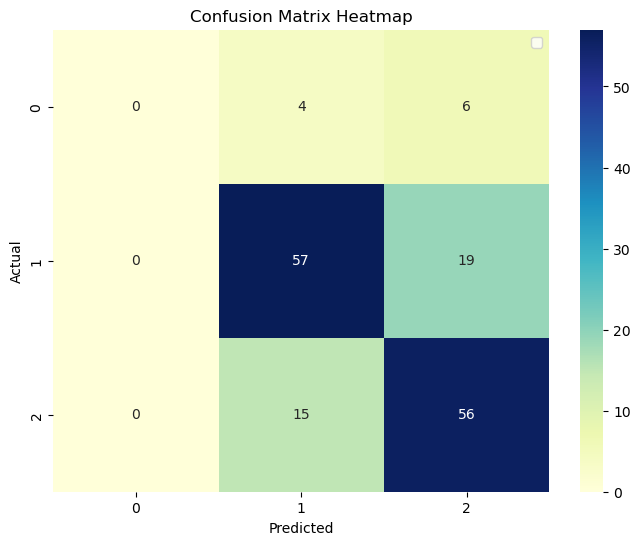

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
plt.figure(figsize=(8, 6))
sns.heatmap(cnf, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.legend()
plt.show()

In [37]:
pd.Series(y).value_counts()

R    288
L    288
B     49
Name: Class Name, dtype: int64

In [41]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)
from sklearn.tree import export_text,plot_tree
r = export_text(dtc,feature_names = feature_names)
print(r)

|--- Right weight <= 2.50
|   |--- Left weight <= 1.50
|   |   |--- Right distance <= 2.50
|   |   |   |--- class: L
|   |   |--- Right distance >  2.50
|   |   |   |--- class: R
|   |--- Left weight >  1.50
|   |   |--- Left distance <= 1.50
|   |   |   |--- class: R
|   |   |--- Left distance >  1.50
|   |   |   |--- class: L
|--- Right weight >  2.50
|   |--- Right distance <= 1.50
|   |   |--- Left weight <= 1.50
|   |   |   |--- class: R
|   |   |--- Left weight >  1.50
|   |   |   |--- class: L
|   |--- Right distance >  1.50
|   |   |--- Left weight <= 3.50
|   |   |   |--- class: R
|   |   |--- Left weight >  3.50
|   |   |   |--- class: R



[Text(0.5, 0.875, 'x[2] <= 2.5\ngini = 0.573\nsamples = 468\nvalue = [39, 212, 217]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\ngini = 0.479\nsamples = 184\nvalue = [18, 125, 41]'),
 Text(0.125, 0.375, 'x[3] <= 2.5\ngini = 0.586\nsamples = 38\nvalue = [6.0, 11.0, 21.0]'),
 Text(0.0625, 0.125, 'gini = 0.56\nsamples = 15\nvalue = [3, 9, 3]'),
 Text(0.1875, 0.125, 'gini = 0.363\nsamples = 23\nvalue = [3, 2, 18]'),
 Text(0.375, 0.375, 'x[1] <= 1.5\ngini = 0.365\nsamples = 146\nvalue = [12, 114, 20]'),
 Text(0.3125, 0.125, 'gini = 0.618\nsamples = 29\nvalue = [5, 10, 14]'),
 Text(0.4375, 0.125, 'gini = 0.204\nsamples = 117\nvalue = [7, 104, 6]'),
 Text(0.75, 0.625, 'x[3] <= 1.5\ngini = 0.517\nsamples = 284\nvalue = [21, 87, 176]'),
 Text(0.625, 0.375, 'x[0] <= 1.5\ngini = 0.423\nsamples = 58\nvalue = [3, 42, 13]'),
 Text(0.5625, 0.125, 'gini = 0.486\nsamples = 12\nvalue = [1, 3, 8]'),
 Text(0.6875, 0.125, 'gini = 0.267\nsamples = 46\nvalue = [2, 39, 5]'),
 Text(0.875, 0.375, 'x[0] <= 3.5\ngini = 0.

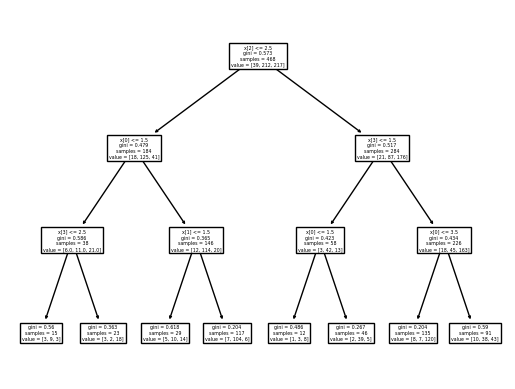

In [55]:
plot_tree(dtc)

In [53]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        10
           L       0.90      0.91      0.90        76
           R       0.92      0.86      0.89        71

    accuracy                           0.83       157
   macro avg       0.61      0.59      0.60       157
weighted avg       0.85      0.83      0.84       157

